In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
df = pd.read_csv(r"/mnt/c/Rig/Pandoras BOX/Aadhar/Enrollment cleaned.csv")

In [44]:
df = df[df['state'] != 'UNKNOWN']

In [45]:
df['state'] = df['state'].str.capitalize()
df['district_clean'] = df['district_clean'].str.capitalize()

In [46]:
df['state'].nunique()

36

In [47]:
df.head()

,date,state,district_clean,pincode,age_0_5,age_5_17,age_18_greater,Total Registrations,day,month,year,dayname,dayofweek,quarter,child_ratio,youth_ratio,year_month,is_weekend
0,2025-03-02,Meghalaya,East khasi hills,793121,11,61,37,109,2,3,2025,Sunday,6,1,0.100000,0.554545,2025-03,1
1,2025-03-09,Bihar,Bhagalpur,812005,13,40,18,71,9,3,2025,Sunday,6,1,0.180556,0.555556,2025-03,1
2,2025-03-09,Bihar,Madhubani,847108,18,120,22,160,9,3,2025,Sunday,6,1,0.111801,0.745342,2025-03,1
3,2025-03-09,Bihar,Purba champaran,845304,18,72,12,102,9,3,2025,Sunday,6,1,0.174757,0.699029,2025-03,1
4,2025-03-09,Bihar,Purba champaran,845418,30,48,10,88,9,3,2025,Sunday,6,1,0.337079,0.539326,2025-03,1


In [48]:
df_copy = df.copy()

In [49]:
df["month"].value_counts()

month
9     356029
11    264160
10    203464
12    155995
7       1184
4        847
6        582
5        549
3        168
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS

In [50]:
#sns.displot(x=df["day"], aspect=3)

In [51]:
# sns.set_theme(style="whitegrid")
# #plt.figure(figsize=(40, 5))

# fig, (axes) = plt.subplots(1,2,figsize=(14, 5))
# fig.suptitle("TR vs Date")
# sns.barplot(data=df, x="day", y="Total Registrations",ax=axes[0])
# sns.lineplot(data=df, x="day", y="Total Registrations", marker='o',ax=axes[1])

# plt.tight_layout()
# plt.show()

In [52]:
# Most enrollment entries happen on 15th date.
# However Maximum aggregate total registrations(bulk volume) happen on first of an average month

# ⚠️ Do not include Day 1 in trend analysis without justification. It is really high and maybe due to backlog dump

In [53]:
#sns.displot(x=df["month"], aspect=3)

In [54]:
# Most enrollment entries have been done towards Year end.
# But the total registrations are very less in volume during the Year end
# Maximum Aggregate total registrations happen from Month 5-7. 8th is completely empty!!

In [55]:
df_copy.groupby('year_month')['Total Registrations'].sum()

year_month
2025-03      16582
2025-04     257438
2025-05     183616
2025-06     215734
2025-07     616868
2025-09    1475837
2025-10     779585
2025-11    1052550
2025-12     733236
Name: Total Registrations, dtype: int64

In [56]:
# fig, (axes) = plt.subplots(1,2,figsize=(14, 5))

# daily_agg = df.groupby('day')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
# daily_agg.plot(kind='area', stacked=True, alpha=0.8, colormap='viridis',ax=axes[0])

# daily_agg = df.groupby('month')[['age_0_5', 'age_5_17', 'age_18_greater']].sum()
# daily_agg.plot(kind='area', stacked=True, alpha=0.8, colormap='viridis',ax=axes[1])

In [57]:
# Highest contribution seems to be done by Age(0 to 5), followed by Age(5 to 17) and then 18+

### National Avg./-Month

Text(0, 0.5, 'Total Bio')

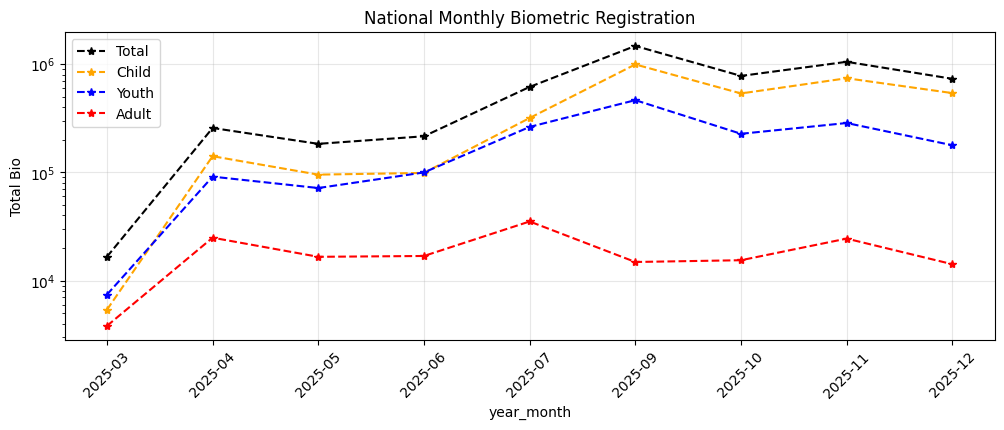

In [58]:
fig,ax = plt.subplots(figsize=(12,4))

monthly = df_copy.groupby(['year_month'])['Total Registrations'].sum()
monthly_child = df_copy.groupby(['year_month'])['age_0_5'].sum()
monthly_youth = df_copy.groupby(['year_month'])['age_5_17'].sum()
monthly_adult = df_copy.groupby(['year_month'])['age_18_greater'].sum()

monthly.plot(title='National Monthly Biometric Registration',marker='*',linestyle='--',color='black',ax=ax,label='Total')
monthly_child.plot(marker='*',linestyle='--',color='orange',ax=ax,label='Child')
monthly_youth.plot(marker='*',linestyle='--',color='blue',ax=ax,label='Youth')
monthly_adult.plot(marker='*',linestyle='--',color='red',ax=ax,label='Adult')
ax.grid(alpha=0.3)
ax.legend()
ax.set_yscale('log')
ax.tick_params('x',rotation=45)
ax.set_ylabel('Total Bio') 

In [59]:
# This graph is similar to the 2nd graph just above(stacked area graph groupedby month vs age)

### Weekday demand pattern

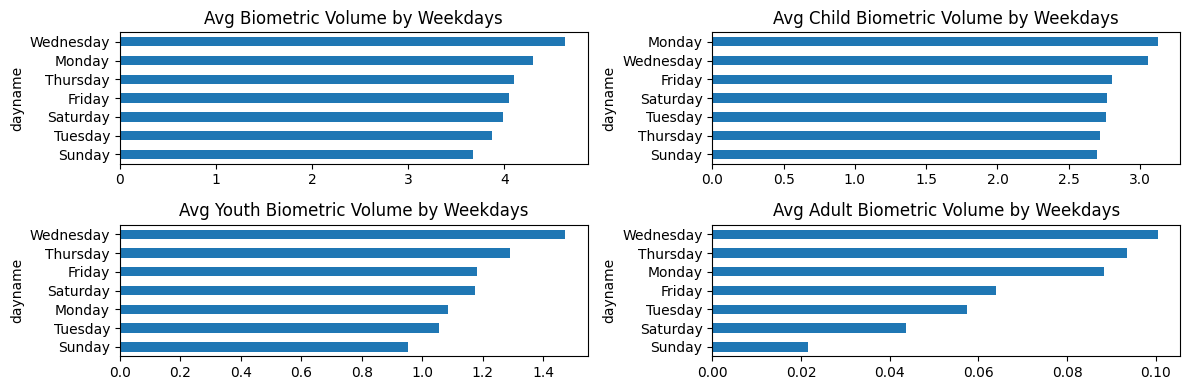

In [60]:
fig,ax = plt.subplots(2,2,figsize=(12,4))

day_wise_data = df_copy[df_copy.month >= 9]
weekday =  day_wise_data.groupby('dayname')['Total Registrations'].mean().sort_values()
weekday_child =  day_wise_data.groupby('dayname')['age_0_5'].mean().sort_values()
weekday_youth =  day_wise_data.groupby('dayname')['age_5_17'].mean().sort_values()
weekday_adult =  day_wise_data.groupby('dayname')['age_18_greater'].mean().sort_values()

weekday.plot(kind='barh',title='Avg Biometric Volume by Weekdays',ax=ax[0,0])
weekday_child.plot(kind='barh',title='Avg Child Biometric Volume by Weekdays',ax=ax[0,1])
weekday_youth.plot(kind='barh',title='Avg Youth Biometric Volume by Weekdays',ax=ax[1,0])
weekday_adult.plot(kind='barh',title='Avg Adult Biometric Volume by Weekdays',ax=ax[1,1])

plt.tight_layout()

### Top regions by Biometric Volume

<Axes: title={'center': '% Contribution by each state in the Total National Enrolment Value'}, xlabel='Percentage Contribution', ylabel='State'>

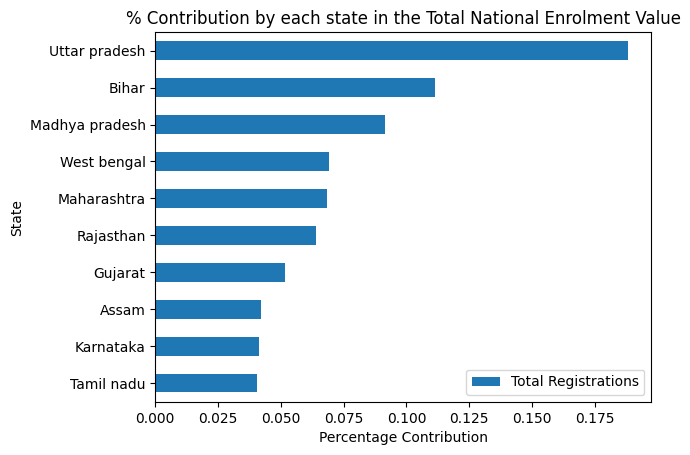

In [61]:
k = 10

national_total = df_copy["Total Registrations"].sum()

top_states = (
    df_copy.groupby('state')['Total Registrations'].sum().sort_values(ascending=False).head(k)
)

top_states_percent = (top_states/national_total) 
top_states_percent = top_states_percent.sort_values(ascending=True)

top_states_percent.plot(
        kind='barh',
        title="% Contribution by each state in the Total National Enrolment Value",
        xlabel='Percentage Contribution',
        ylabel='State',
        legend=True
    )
#top_states.title("contribution by each state in the Total National Biometric Value")

### Youth Behaviour

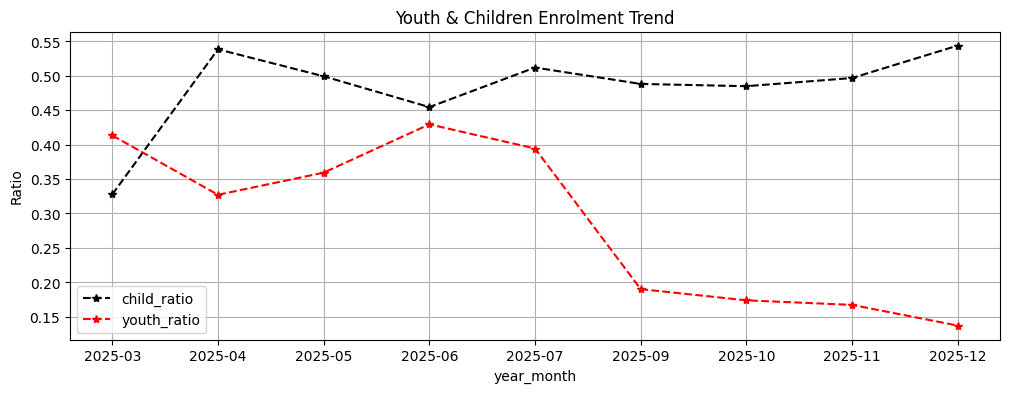

In [62]:
plt.figure(figsize=(12,4))

child_trend = df_copy.groupby('year_month')['child_ratio'].mean()
youth_trend = df_copy.groupby('year_month')['youth_ratio'].mean()

child_trend.plot(kind='line',linestyle='--',color='black',marker='*',title='Children Enrollement Trend')
youth_trend.plot(kind='line',linestyle='--',color='red',marker='*',title='Youth Enrollement Trend')

plt.ylabel('Ratio')
plt.title('Youth & Children Enrolment Trend')
plt.legend()
plt.grid()

### District with unstable demand (Adv Viz - 01)

Text(0.5, 1.0, '10 Most Volatile Districts for Enrollment Volume')

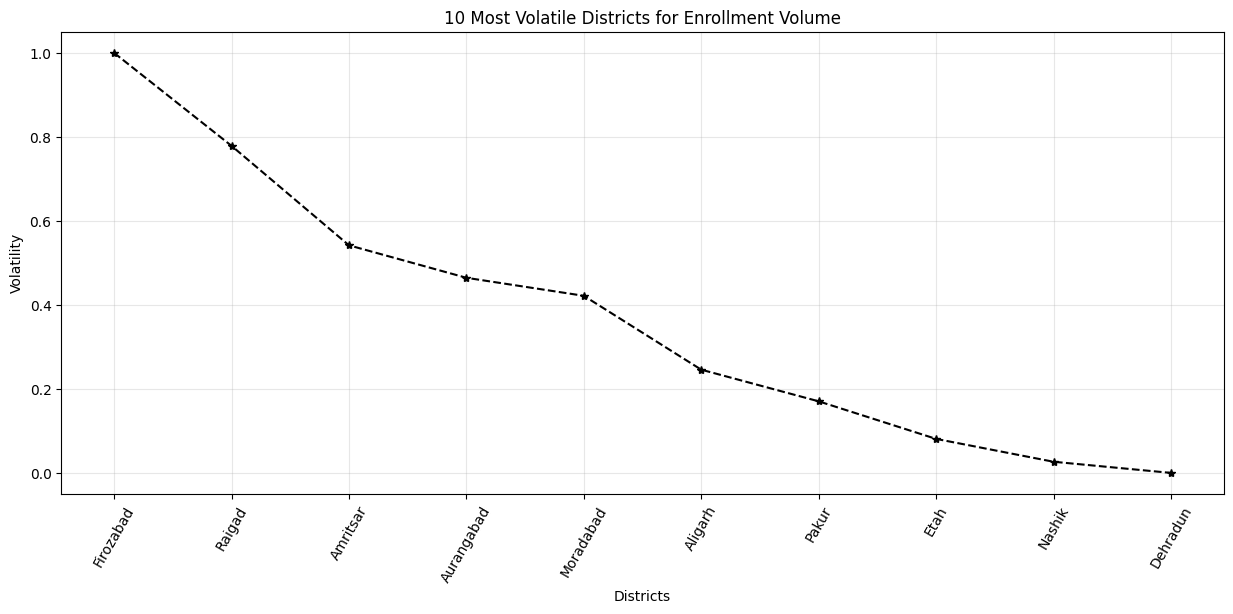

In [63]:
top_k=10

district_stats = (
    df_copy.groupby('district_clean')['Total Registrations']
    .agg(['std','mean'])
)

district_stats['volatility'] = district_stats['std'] / (district_stats['mean'] + 1)
# state_stats['volatility'] = state_stats['std'] / (state_stats['mean'] + 1)
min_max = MinMaxScaler()
district_stats = district_stats.sort_values(by=['volatility'],ascending=False).head(top_k)

volatility = min_max.fit_transform(district_stats['volatility'].values.reshape(-1,1))
label = district_stats.index.tolist()


fig,ax = plt.subplots(figsize=(15,6))
# district_stats['volatility'].sort_values(ascending=False).head(top_k).plot(kind='line',ax=ax,marker='*',linestyle='--',color='black',linewidth=1.5)
ax.plot(label,volatility,marker='*',linestyle='--',color='black')
ax.grid(alpha=0.3)
ax.tick_params('x',rotation=60)
ax.set_ylabel('Volatility')
ax.set_xlabel('Districts')
ax.set_title(f'{top_k} Most Volatile Districts for Enrollment Volume')

### Risk Profiling

In [64]:
g = df_copy.groupby(['state','district_clean','year_month'])['Total Registrations'].sum().reset_index()

stats = (
    g.groupby(['state','district_clean'])['Total Registrations']
    .agg(['mean','std','min','max'])
)

stats['volatility'] = stats['std']/(stats['mean']+1)

stats['range_ratio'] = (stats['max']-stats['min']) / (stats['mean']+1)

stats.head()

mean         std  min  \
state                       district_clean                                      
Andaman and nicobar islands Nicobar                    18.50   19.122413    6   
                            North and middle andaman   32.25    8.995369   21   
                            South andaman              56.00   15.253415   36   
Andhra pradesh              Adilabad                  348.75  227.228776  106   
                            Alluri sitharama raju     303.50   62.872888  245   

                                                      max  volatility  \
state                       district_clean                              
Andaman and nicobar islands Nicobar                    47    0.980637   
                            North and middle andaman   40    0.270537   
                            South andaman              73    0.267604   
Andhra pradesh              Adilabad                  654    0.649689   
                            Alluri sitharama raju     387    0.206479   

                                                      range_ratio  
state                       district_clean                         
Andaman and nicobar islands Nicobar                      2.102564  
                            North and middle andaman     0.571429  
                            South andaman                0.649123  
Andhra pradesh              Adilabad                     1.566833  
                            Alluri sitharama raju        0.466338

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN

X = stats[['mean','volatility','range_ratio']].fillna(0)

X_scaled = StandardScaler().fit_transform(X)

stats['cluster_kmeans'] = KMeans(n_clusters=4,random_state=42).fit_predict(X_scaled)
stats['cluster_dbscan'] = DBSCAN(n_jobs=-1).fit_predict(X_scaled)

stats.head()


# stats_scaled = pd.DataFrame(np.concatenate((X_scaled,stats['cluster'].values)),columns=[f'col_{idx+1}' for idx in range(X.shape[1]+1)])

mean         std  min  \
state                       district_clean                                      
Andaman and nicobar islands Nicobar                    18.50   19.122413    6   
                            North and middle andaman   32.25    8.995369   21   
                            South andaman              56.00   15.253415   36   
Andhra pradesh              Adilabad                  348.75  227.228776  106   
                            Alluri sitharama raju     303.50   62.872888  245   

                                                      max  volatility  \
state                       district_clean                              
Andaman and nicobar islands Nicobar                    47    0.980637   
                            North and middle andaman   40    0.270537   
                            South andaman              73    0.267604   
Andhra pradesh              Adilabad                  654    0.649689   
                            Alluri sitharama raju     387    0.206479   

                                                      range_ratio  \
state                       district_clean                          
Andaman and nicobar islands Nicobar                      2.102564   
                            North and middle andaman     0.571429   
                            South andaman                0.649123   
Andhra pradesh              Adilabad                     1.566833   
                            Alluri sitharama raju        0.466338   

                                                      cluster_kmeans  \
state                       district_clean                             
Andaman and nicobar islands Nicobar                                1   
                            North and middle andaman               2   
                            South andaman                          2   
Andhra pradesh              Adilabad                               3   
                            Alluri sitharama raju                  2   

                                                      cluster_dbscan  
state                       district_clean                            
Andaman and nicobar islands Nicobar                                0  
                            North and middle andaman               0  
                            South andaman                          0  
Andhra pradesh              Adilabad                               0  
                            Alluri sitharama raju                  0

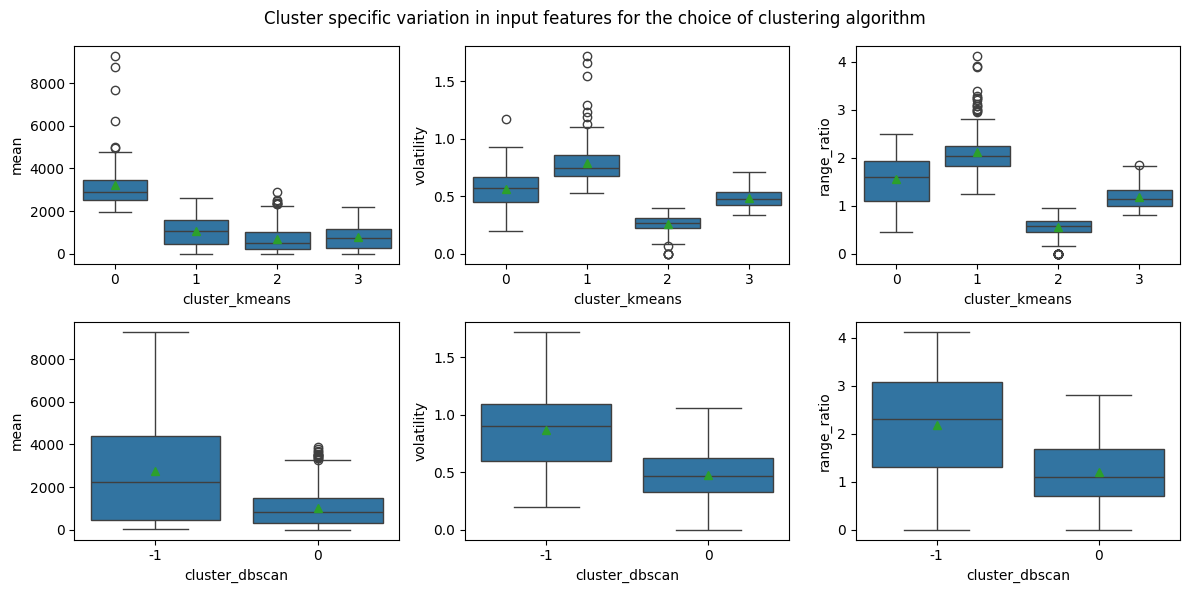

In [66]:
import seaborn as sns

fig,ax = plt.subplots(2,3,figsize=(12,6))
fig.suptitle('Cluster specific variation in input features for the choice of clustering algorithm')
# for idx,cols in enumerate(['mean','volatility','range_ratio']):
#     sns.boxplot(
#         data=stats,
#         y = cols,
#         x = stats['cluster'],
#         ax=ax[idx]
#     )
get_cols = ['mean','volatility','range_ratio']

for j in range(3):
    sns.boxplot(
        data=stats,
        y = get_cols[j],
        x = stats['cluster_kmeans'],
        showmeans=True,
        ax = ax[0,j]
    )
    sns.boxplot(
        data=stats,
        y = get_cols[j],
        x = stats['cluster_dbscan'],
        showmeans=True,
        ax = ax[1,j]
    )
plt.tight_layout()

In [67]:
CLUSTER_NAMES = {
          0: "High Demand, Moderately Stable",
          1: "Volatile",
          2: "Under-utilized Stable",
          3: "Stable Mid-Demand",
}

CLUSTER_COLORS = {
        0:'tab:blue',
        1:'tab:green',
        2:'tab:red',
        3:'tab:purple',
}

In [68]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

INPUT = stats.fillna(0)

INPUT_scaled = StandardScaler().fit_transform(INPUT[['mean','volatility','range_ratio']])

tsne = TSNE().fit_transform(INPUT_scaled)
pca = PCA(n_components=2).fit_transform(INPUT_scaled)



# plt.scatter(tsne[:,0],tsne[:,1],c=INPUT['cluster_dbscan'],cmap='viridis')
# plt.grid(alpha=.3)
# plt.title('t-SNE Cluster Representation - DBSCAN')

# plt.subplot(2,2,4)
# plt.scatter(pca[:,0],pca[:,1],c=INPUT['cluster_dbscan'],cmap='viridis')
# plt.grid(alpha=.3)
# plt.title('PCA Cluster Representation - DBSCAN')

#plt.tight_layout()

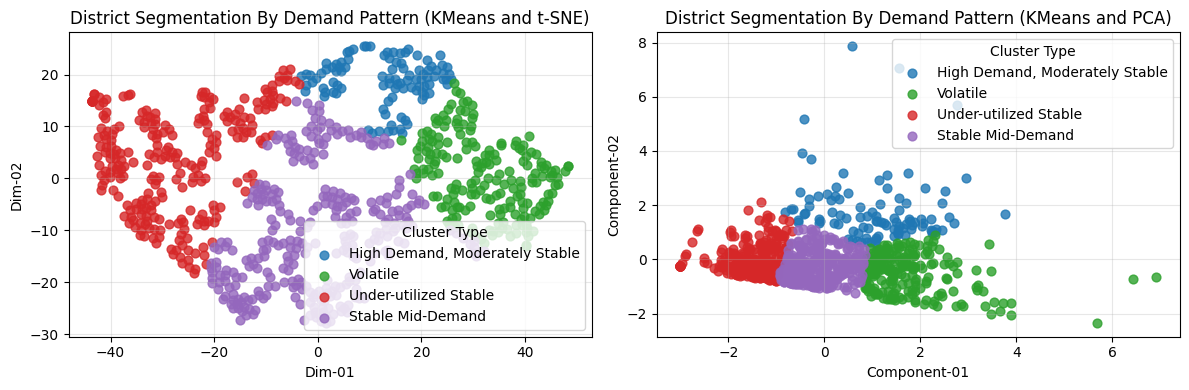

In [69]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

labels = INPUT['cluster_kmeans'].values

for c in sorted(set(labels)):
    mask = (labels==c)
    ax[0].scatter(
        tsne[mask,0],
        tsne[mask,1],
        s=40,
        alpha=0.8,
        c = CLUSTER_COLORS[c],
        label=CLUSTER_NAMES[c]
    )

    ax[1].scatter(
            pca[mask,0],
            pca[mask,1],
            s=40,
            alpha=0.8,
            c = CLUSTER_COLORS[c],
            label=CLUSTER_NAMES[c]
        )

ax[0].set_title('District Segmentation By Demand Pattern (KMeans and t-SNE)')
ax[0].set_xlabel('Dim-01')
ax[0].set_ylabel('Dim-02')
ax[0].legend(title='Cluster Type')
ax[0].grid(alpha=0.3)

ax[1].set_title('District Segmentation By Demand Pattern (KMeans and PCA)')
ax[1].set_xlabel('Component-01')
ax[1].set_ylabel('Component-02')
ax[1].legend(title='Cluster Type')
ax[1].grid(alpha=0.3)

plt.tight_layout()

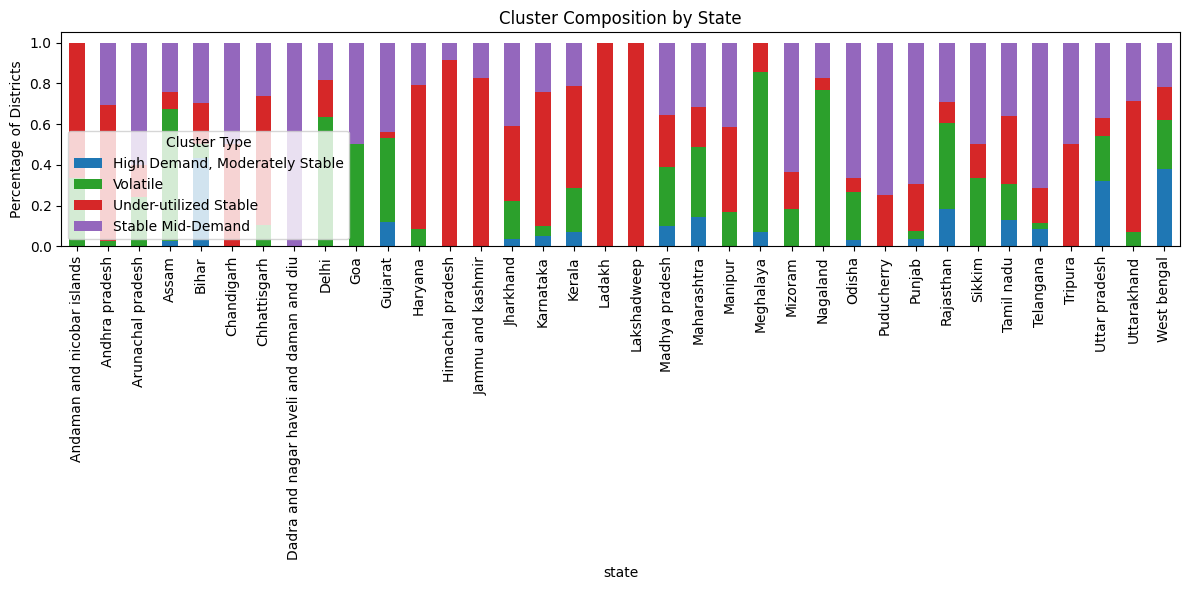

In [70]:
state_cluster_distribution = (
    INPUT.reset_index()
    .groupby(['state','cluster_kmeans'])
    .size()
    .reset_index(name='count')
)

pivot = state_cluster_distribution.pivot(
    index='state',
    columns='cluster_kmeans',
    values='count'
).fillna(0)


state_pct = pivot.div(pivot.sum(axis=1),axis=0)


state_pct.plot(kind='bar',stacked=True,figsize=(12,6),color=[CLUSTER_COLORS[c] for c in pivot.columns])

plt.legend([CLUSTER_NAMES[c] for c in pivot.columns], title="Cluster Type")
plt.title("Cluster Composition by State")
plt.ylabel("Percentage of Districts")
plt.tight_layout()
plt.show()

### Total cluster distribution

<Axes: xlabel='cluster'>

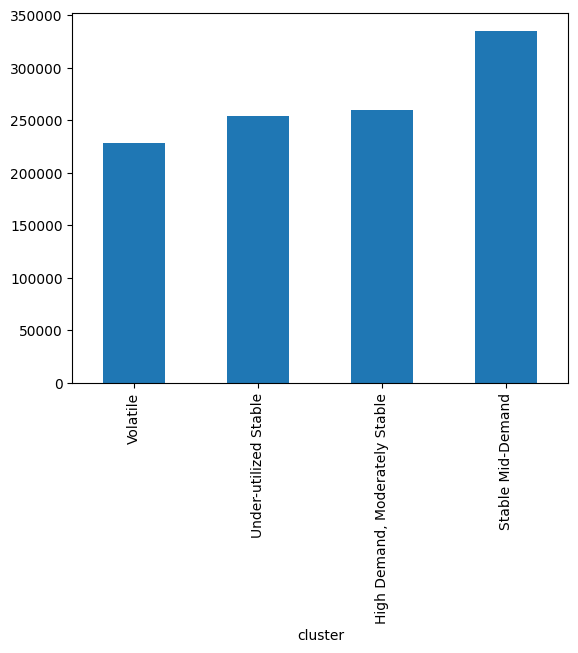

In [71]:
df_clustered = pd.merge(left=df_copy,right=INPUT,how='left',on = 'district_clean')[df_copy.columns.tolist()+['cluster_kmeans']]
df_clustered['cluster'] = df_clustered['cluster_kmeans'].map(CLUSTER_NAMES)
df_clustered.groupby(['cluster']).size().sort_values().plot(kind='bar')

In [73]:
df_clustered.to_csv('clustered_enrol.csv',index=False)

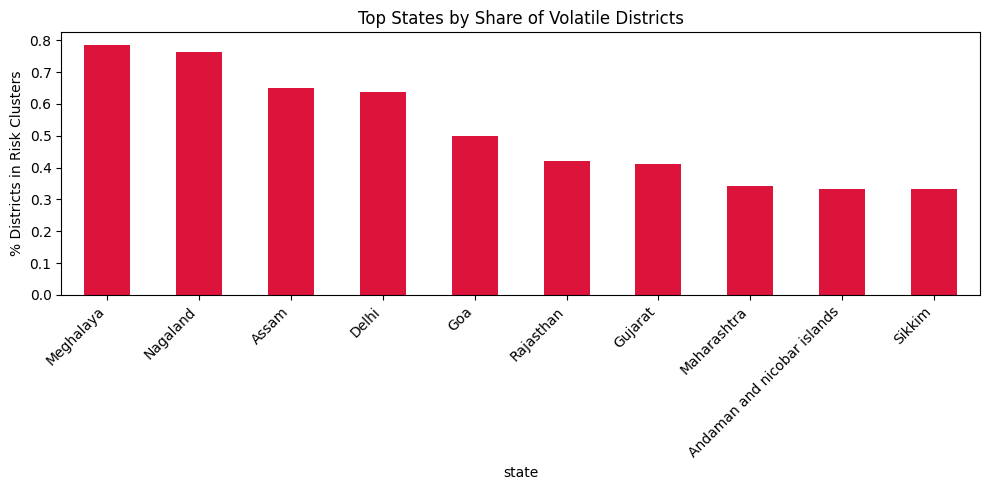

In [74]:
RISK_CLUSTERS = [1]

# total districts per state
state_total = pivot.sum(axis=1)

# risky districts per state
state_risk = pivot[RISK_CLUSTERS].sum(axis=1)

# percentage
state_risk_pct = (state_risk / state_total).sort_values(ascending=False)


top_states = state_risk_pct.head(10)

plt.figure(figsize=(10,5))
top_states.plot(kind="bar", color="crimson")

plt.ylabel("% Districts in Risk Clusters")
plt.title("Top States by Share of Volatile Districts")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

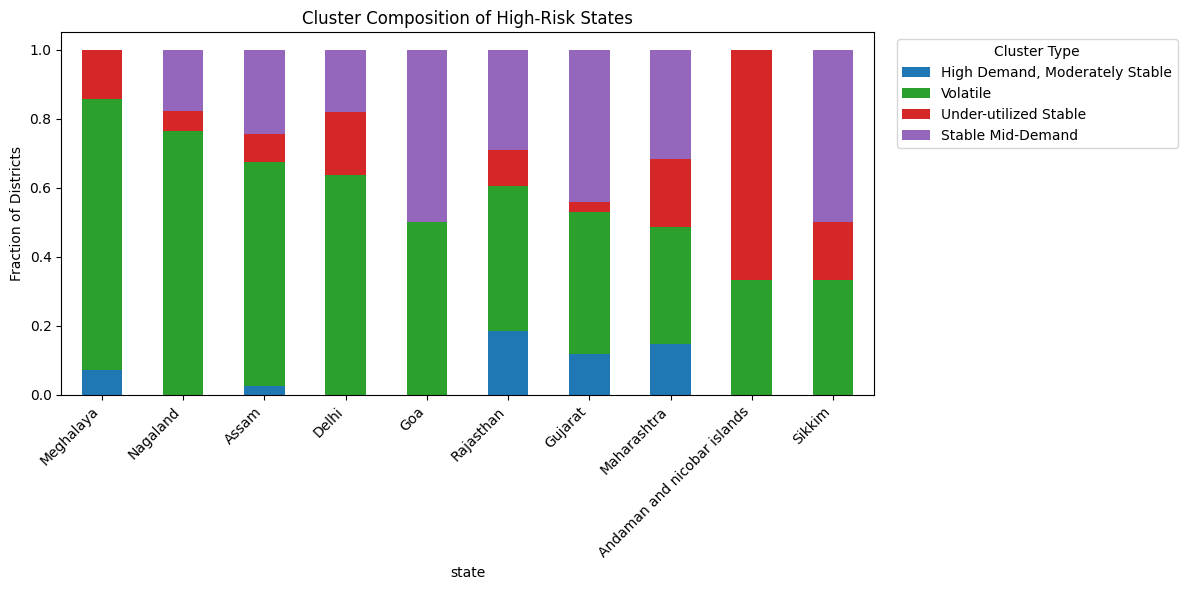

In [75]:
top_state_names = top_states.index

top_state_pct = state_pct.loc[top_state_names]

top_state_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    color=[CLUSTER_COLORS[c] for c in top_state_pct.columns]
)

plt.legend([CLUSTER_NAMES[c] for c in top_state_pct.columns],
           title="Cluster Type",
           bbox_to_anchor=(1.02,1), loc="upper left")

plt.ylabel("Fraction of Districts")
plt.title("Cluster Composition of High-Risk States")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [78]:
stats

mean          std  \
state                       district_clean                                   
Andaman and nicobar islands Nicobar                     18.50    19.122413   
                            North and middle andaman    32.25     8.995369   
                            South andaman               56.00    15.253415   
Andhra pradesh              Adilabad                   348.75   227.228776   
                            Alluri sitharama raju      303.50    62.872888   
...                                                       ...          ...   
West bengal                 South 24 pargana             1.00     0.000000   
                            South 24 parganas         9284.50  2376.104585   
                            South dinajpur             108.50    56.653920   
                            Uttar dinajpur            4407.50  2334.914452   
                            West midnapore             538.00   241.684367   

                                                       min    max  volatility  \
state                       district_clean                                      
Andaman and nicobar islands Nicobar                      6     47    0.980637   
                            North and middle andaman    21     40    0.270537   
                            South andaman               36     73    0.267604   
Andhra pradesh              Adilabad                   106    654    0.649689   
                            Alluri sitharama raju      245    387    0.206479   
...                                                    ...    ...         ...   
West bengal                 South 24 pargana             1      1    0.000000   
                            South 24 parganas         5745  10737    0.255894   
                            South dinajpur              56    189    0.517387   
                            Uttar dinajpur            1713   8083    0.529639   
                            West midnapore             261    848    0.448394   

                                                      range_ratio  \
state                       district_clean                          
Andaman and nicobar islands Nicobar                      2.102564   
                            North and middle andaman     0.571429   
                            South andaman                0.649123   
Andhra pradesh              Adilabad                     1.566833   
                            Alluri sitharama raju        0.466338   
...                                                           ...   
West bengal                 South 24 pargana             0.000000   
                            South 24 parganas            0.537612   
                            South dinajpur               1.214612   
                            Uttar dinajpur               1.444936   
                            West midnapore               1.089054   

                                                      cluster_kmeans  \
state                       district_clean                             
Andaman and nicobar islands Nicobar                                1   
                            North and middle andaman               2   
                            South andaman                          2   
Andhra pradesh              Adilabad                               3   
                            Alluri sitharama raju                  2   
...                                                              ...   
West bengal                 South 24 pargana                       2   
                            South 24 parganas                      0   
                            South dinajpur                         3   
                            Uttar dinajpur                         0   
                            West midnapore                         3   

                                                      cluster_dbscan  
state                       district_clean                            
Andaman and

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

stats[['vol_n','range_n','mean_n']] = scaler.fit_transform(
    stats[['volatility','range_ratio','mean']]
)

stats['priority_score'] = 0.4*stats['vol_n'] + 0.4*stats['range_n'] + 0.2*(1-stats['mean_n'])

stats.head()

mean         std  min  \
state                       district_clean                                      
Andaman and nicobar islands Nicobar                    18.50   19.122413    6   
                            North and middle andaman   32.25    8.995369   21   
                            South andaman              56.00   15.253415   36   
Andhra pradesh              Adilabad                  348.75  227.228776  106   
                            Alluri sitharama raju     303.50   62.872888  245   

                                                      max  volatility  \
state                       district_clean                              
Andaman and nicobar islands Nicobar                    47    0.980637   
                            North and middle andaman   40    0.270537   
                            South andaman              73    0.267604   
Andhra pradesh              Adilabad                  654    0.649689   
                            Alluri sitharama raju     387    0.206479   

                                                      range_ratio  \
state                       district_clean                          
Andaman and nicobar islands Nicobar                      2.102564   
                            North and middle andaman     0.571429   
                            South andaman                0.649123   
Andhra pradesh              Adilabad                     1.566833   
                            Alluri sitharama raju        0.466338   

                                                      cluster_kmeans  \
state                       district_clean                             
Andaman and nicobar islands Nicobar                                1   
                            North and middle andaman               2   
                            South andaman                          2   
Andhra pradesh              Adilabad                               3   
                            Alluri sitharama raju                  2   

                                                      cluster_dbscan  \
state                       district_clean                             
Andaman and nicobar islands Nicobar                                0   
                            North and middle andaman               0   
                            South andaman                          0   
Andhra pradesh              Adilabad                               0   
                            Alluri sitharama raju                  0   

                                                         vol_n   range_n  \
state                       district_clean                                 
Andaman and nicobar islands Nicobar                   0.569889  0.510277   
                            North and middle andaman  0.157221  0.138681   
                            South andaman             0.155516  0.157537   
Andhra pradesh              Adilabad                  0.377562  0.380259   
                            Alluri sitharama raju     0.119994  0.113177   

                                                        mean_n  priority_score  
state                       district_clean                                      
Andaman and nicobar islands Nicobar                   0.001885        0.631689  
                            North and middle andaman  0.003366        0.317688  
                            South andaman             0.005924        0.324036  
Andhra pradesh              Adilabad                  0.037459        0.495636  
                            Alluri sitharama raju     0.032585        0.286751

In [80]:
stats.reset_index()

,state,district_clean,mean,std,min,max,volatility,range_ratio,cluster_kmeans,cluster_dbscan,vol_n,range_n,mean_n,priority_score
0,Andaman and nicobar islands,Nicobar,18.50,19.122413,6,47,0.980637,2.102564,1,0,0.569889,0.510277,0.001885,0.631689
1,Andaman and nicobar islands,North and middle andaman,32.25,8.995369,21,40,0.270537,0.571429,2,0,0.157221,0.138681,0.003366,0.317688
2,Andaman and nicobar islands,South andaman,56.00,15.253415,36,73,0.267604,0.649123,2,0,0.155516,0.157537,0.005924,0.324036
3,Andhra pradesh,Adilabad,348.75,227.228776,106,654,0.649689,1.566833,3,0,0.377562,0.380259,0.037459,0.495636
4,Andhra pradesh,Alluri sitharama raju,303.50,62.872888,245,387,0.206479,0.466338,2,0,0.119994,0.113177,0.032585,0.286751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,West bengal,South 24 pargana,1.00,0.000000,1,1,0.000000,0.000000,2,0,0.000000,0.000000,0.000000,0.200000
849,West bengal,South 24 parganas,9284.50,2376.104585,5745,10737,0.255894,0.537612,0,-1,0.148711,0.130475,1.000000,0.111674
850,West bengal,South dinajpur,108.50,56.653920,56,189,0.517387,1.214612,3,0,0.300675,0.294777,0.011580,0.435865
851,West bengal,Uttar dinajpur,4407.50,2334.914452,1713,8083,0.529639,1.444936,0,-1,0.307796,0.350675,0.474659,0.368456


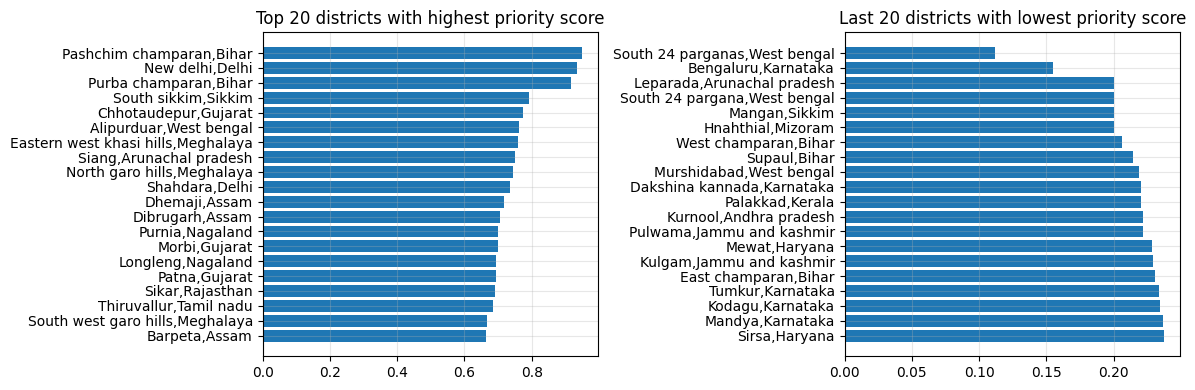

In [82]:
priority_districts_desc = (
    stats.reset_index().sort_values(by='priority_score',ascending=False)
    [['state','district_clean','cluster_kmeans','priority_score']]
    .head(20)
)

priority_districts_asc = (
    stats.reset_index().sort_values(by='priority_score',ascending=True)
    [['state','district_clean','cluster_kmeans','priority_score']]
    .head(20)
)

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].barh(y = priority_districts_desc.apply(lambda row: row['district_clean']+","+row['state'],axis=1),width=priority_districts_desc['priority_score'])
ax[0].set_title('Top 20 districts with highest priority score')
ax[0].grid(alpha=0.3)
ax[0].invert_yaxis()

ax[1].barh(y = priority_districts_asc.apply(lambda row: row['district_clean']+","+row['state'],axis=1),width=priority_districts_asc['priority_score'])
ax[1].set_title('Last 20 districts with lowest priority score')
ax[1].grid(alpha=0.3)
ax[1].invert_yaxis()

plt.tight_layout()

In [84]:
state_burden = (
    stats.groupby('state')
    .agg(
        avg_risk = ('priority_score','mean'),
        volatile_share = ('cluster_kmeans',lambda x: (x==2).mean()),
        under_utilized_share = ('cluster_kmeans',lambda x: (x==3).mean())
    ).reset_index()
)

state_burden = state_burden.sort_values(by = 'avg_risk',ascending=False)

In [86]:
y_labels = state_burden.state.values[:15]
width = state_burden.avg_risk.values[:15]
volatile_pct = state_burden.volatile_share.values[:15]

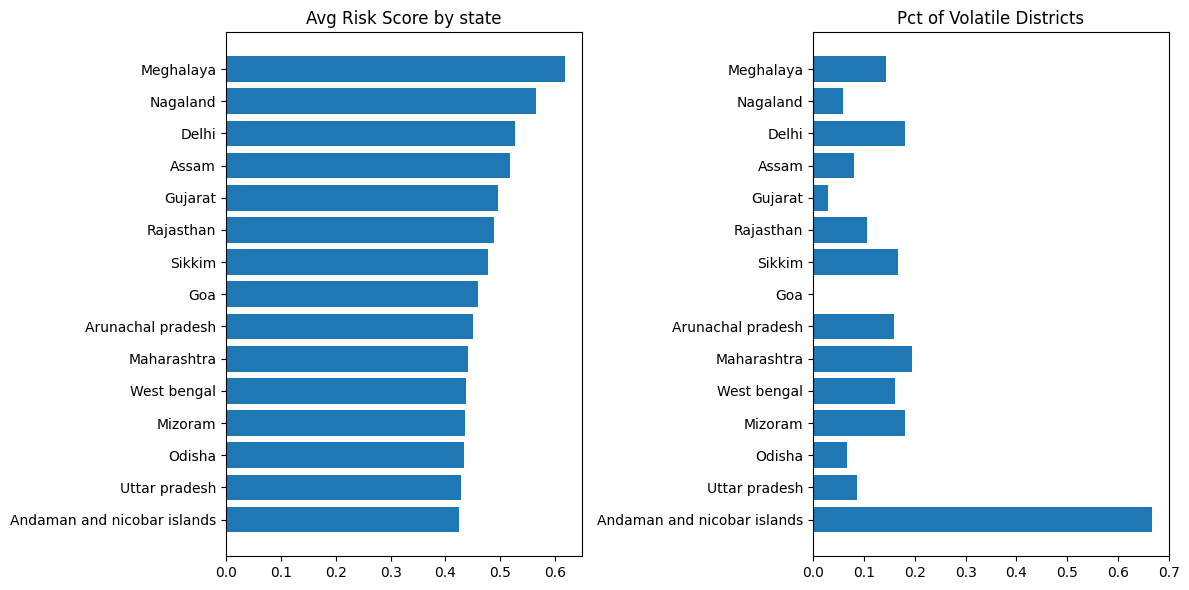

In [87]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

ax[0].barh(y=y_labels,width = width)
ax[0].invert_yaxis()
ax[0].set_title('Avg Risk Score by state')


ax[1].barh(y=y_labels,width = volatile_pct)
ax[1].invert_yaxis()
ax[1].set_title('Pct of Volatile Districts')
plt.tight_layout()